# Bag of words creation
![](https://www.excelr.com/uploads/blog/python_blog2.jpg)
```
The bag-of-words model is one of the most popular representation methods for object categorization. The key idea is to quantize each extracted key point into one of visual words, and then represent each image by a histogram of the visual words. 
```

# 1. Libraries

In [2]:
import pandas as pd
import re
import nltk
import string
import operator
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 2. Modules


## 2.1. Data Reading

In [3]:
def read_data(path, key, key2):
    data = pd.read_csv(path, sep=';')
    title_list_row = data[key].values.tolist()
    object_list_row = data[key2].values.tolist()
    list_row = []
    for i in range (len(title_list_row)):
        list_row += [str(title_list_row[i]) + str(object_list_row[i])]
    return list_row

## 2.2. Data Cleaning

In [4]:
def remove_useless_data(rows, stop_words=[], withstemmer = False):
    new_rows = list()
    # regular expressions to remove the useless characters
    pattern1 = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    pattern2 = re.compile('[,.\"!@#$%^&*(){}?/;`~:<>+=-]')
    table = str.maketrans('', '', string.punctuation)
    raices = []
    for row in rows:
        row = row.lower();
        row = pattern1.sub('', row)
        row = pattern2.sub('', row)
        tokens = word_tokenize(row)
        row_no_punctuation = [w.translate(table) for w in tokens]
        row_no_num = [w for w in row_no_punctuation if w.isalpha()]
        row = [w for w in row_no_num if not w in stop_words]
        raices+=[SnowballStemmer('spanish').stem(w) for w in row_no_num if not w in stop_words]
        new_rows+=row
        
    if(withstemmer):
        stemmedwords = dict()
        non_repeated = list(set(raices))
        dict_words_frec = count_word_frecuency(new_rows)
        for key in dict_words_frec.keys():
            for word in non_repeated:
                if word in key:
                    stemmedwords[key]=dict_words_frec[key]
                    non_repeated.remove(word)
                    break
            if len(non_repeated)==0:
                break
        return stemmedwords
    return new_rows

## 2.3. Show WordCloud

In [5]:
def show_wordcloud(sentences, save=False, img_name=None):
  wordcloud = WordCloud(
    background_color = 'white',
    max_words = 1000,
    relative_scaling = 1,
    scale = 3,
    random_state=1,
    collocations=False
  ).generate_from_frequencies(sentences)
  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')
  plt.imshow(wordcloud)
  if save: plt.savefig(img_name)
  plt.show()

In [ ]:
def count_word_frecuency(words):
    w_frequency = dict()
    for word in words:
        if word not in w_frequency:
            w_frequency[word]=words.count(word)
    sorted_d = dict( sorted(w_frequency.items(), key=operator.itemgetter(1),reverse=True))
    return sorted_d

# 3. Results


In [7]:
if __name__ == "__main__":
  stop_words_file = open('../input/spanish-processing-language/spanish_stopwords.txt', 'r')
  spanish_stop_words = stop_words_file.read().splitlines()
  stop_words_file.close()

## 3.1. Congressional periods
![](https://diariocorreo.pe/resizer/yUlRaAGusZHq-APe1H8ilsWnV_s=/580x330/smart/filters:format(jpeg):quality(75)/arc-anglerfish-arc2-prod-elcomercio.s3.amazonaws.com/public/LA4VJEAOHNEUZDY6GTKAJQ335Q.jpg)

### 3.1.1. First congress(Pre-covid19)

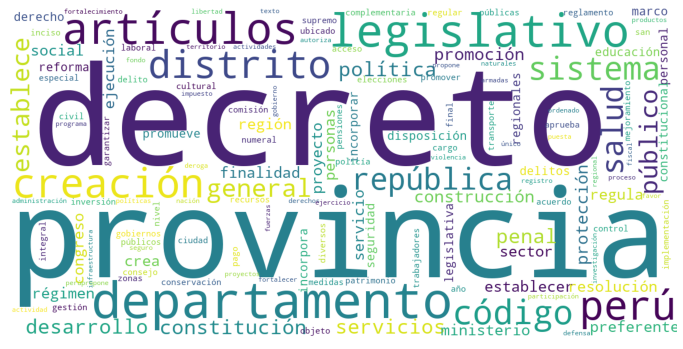

In [8]:
rows = read_data('../input/proposed-laws-peru-201611072021/First_congress.csv', 'Título', 'Objeto')
rows = remove_useless_data(rows, spanish_stop_words, True)
show_wordcloud(rows, save=True, img_name='First_congress.png')

### 3.1.2. Second congress(estado de emergencia)

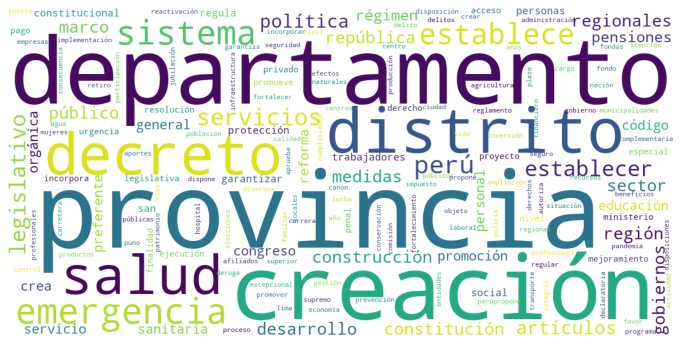

In [9]:
rows = read_data('../input/proposed-laws-peru-201611072021/Second_congress.csv', 'Título', 'Objeto')
rows = remove_useless_data(rows, spanish_stop_words, True)
show_wordcloud(rows, save=True, img_name='Second_congress.png')

## 3.2. Presidential periods

### 3.2.1 Pedro Pablo Kuczynski
![PPK](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6FxAvm1iJZvW-PK_CEL24_kHvF5oM6CcxYJFwi3P92uYllVpspYOtRPct3AjA03TsrWfF_iul&usqp=CAU)

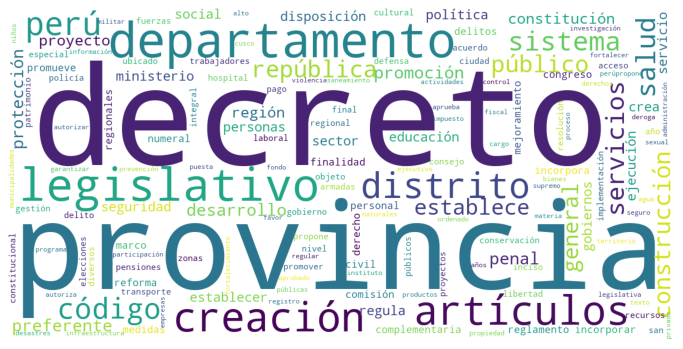

In [10]:
rows = read_data('../input/proposed-laws-peru-201611072021/PKuczynski_period.csv', 'Título', 'Objeto')
rows = remove_useless_data(rows, spanish_stop_words, True)
show_wordcloud(rows, save=True, img_name='PKuczynski_period.png')

### Martín Alberto Vizcarra Cornejo
![MartinV](https://img.wattpad.com/useravatar/MartinVizcarra_.128.971053.jpg)

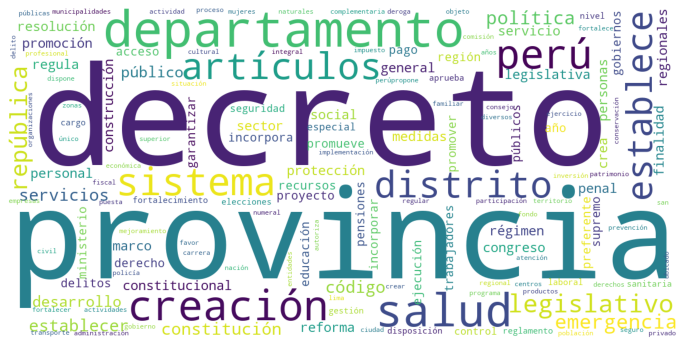

In [11]:
rows = read_data('../input/proposed-laws-peru-201611072021/MVizcarra_period.csv', 'Título', 'Objeto')
rows = remove_useless_data(rows, spanish_stop_words, True)
show_wordcloud(rows, save=True, img_name='MVizcarra_period.png')

### Manuel Arturo Merino de Lama
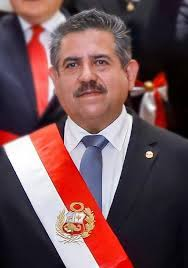

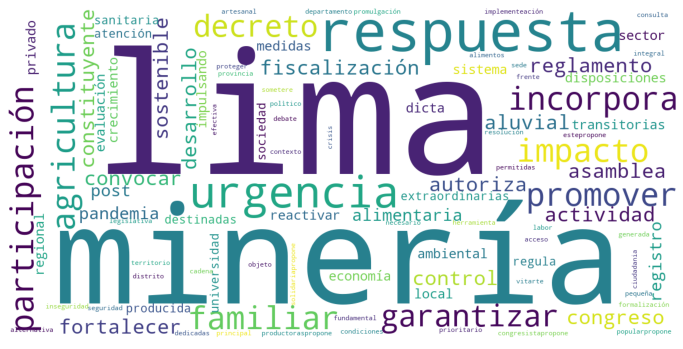

In [12]:
rows = read_data('../input/proposed-laws-peru-201611072021/MMerino_period.csv', 'Título', 'Objeto')
rows = remove_useless_data(rows, spanish_stop_words, True)
show_wordcloud(rows, save=True, img_name='MMerino_period.png')

### Francisco Rafael Sagasti Hochhausler
![sagasti](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSaLWUVtShzwwPbiSQBuUbL27Idvuep2HvEWZYXtv5sREMETgrfZy2jKZHoyG4I0Wzl5aih0BMpgNc&usqp=CAU)

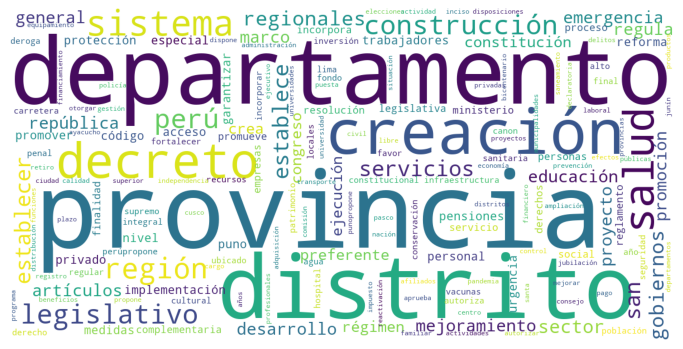

In [13]:
rows = read_data('../input/proposed-laws-peru-201611072021/FSagasti_period.csv', 'Título', 'Objeto')
rows = remove_useless_data(rows, spanish_stop_words, True)
show_wordcloud(rows, save=True, img_name='FSagasti_period.png')